<a href="https://colab.research.google.com/github/DEBANJANAB/Breast_Cancer_Detection-using-CNN/blob/master/Breast_Cancer_IDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!ls

kaggle.json  sample_data


In [3]:
!kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                       179MB  2020-05-21 18:57:53          16975  
rohanrao/chai-time-data-science                             Chai Time Data Science | CTDS.Show                 3MB  2020-07-23 17:23:46            509  
garystafford/environmental-sensor-data-132k                 Environmental Sensor Telemetry Data                7MB  2020-07-20 17:18:10            120  
tanmoyx/covid19-patient-precondition-dataset                COVID-19 patient pre-condition dataset             8MB  2020-07-22 16:37:50            574  
andrewmvd/data-analyst-jobs                                 Data Analyst Jobs     

In [4]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images -p /content

100% 3.10G/3.10G [00:52<00:00, 15.8MB/s]



In [5]:
!unzip '*.zip'

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2351_class0.png  
  inflating: IDC_regular_

In [6]:
from numpy.random import seed
seed(101)




import pandas as pd
import numpy as np

import tensorflow
tensorflow.random.set_seed(101)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
import cv2

import imageio
import skimage
import skimage.io
import skimage.transform

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Number of samples we want in each class.Total images used = SAMPLE_SIZE X 2
# The minority class is class 1 with 78786 samples.

SAMPLE_SIZE = 78786

IMAGE_SIZE = 50

In [8]:
patients=os.listdir('IDC_regular_ps50_idx5')
len(patients)

279

In [9]:
!ls

10253  12242  12895  13459  15472  8916  9225
10254  12626  12896  13460  15473  8917  9226
10255  12748  12897  13461  15510  8918  9227
10256  12749  12898  13462  15512  8950  9228
10257  12750  12900  13591  15513  8951  9250
10258  12751  12901  13613  15514  8955  9254
10259  12752  12905  13616  15515  8956  9255
10260  12810  12906  13617  15516  8957  9256
10261  12811  12907  13666  15632  8959  9257
10262  12817  12908  13687  15633  8974  9258
10264  12818  12909  13688  15634  8975  9259
10268  12819  12910  13689  15839  8980  9260
10269  12820  12911  13691  15840  8984  9261
10272  12821  12929  13692  15902  9022  9262
10273  12822  12930  13693  15903  9023  9265
10274  12823  12931  13694  16014  9029  9266
10275  12824  12932  13916  16085  9035  9267
10276  12826  12933  14078  16165  9036  9290
10277  12867  12934  14079  16166  9037  9291
10278  12868  12935  14081  16167  9041  9319
10279  12869  12947  14082  16531  9043  9320
10282  12870  12948  14153  16532 

In [10]:
 #Create a new directory to store all available images
all_images_dir = 'all_images_dir'
os.mkdir(all_images_dir)


In [11]:
!ls

10253  12242  12895  13459  15472  8916  9225
10254  12626  12896  13460  15473  8917  9226
10255  12748  12897  13461  15510  8918  9227
10256  12749  12898  13462  15512  8950  9228
10257  12750  12900  13591  15513  8951  9250
10258  12751  12901  13613  15514  8955  9254
10259  12752  12905  13616  15515  8956  9255
10260  12810  12906  13617  15516  8957  9256
10261  12811  12907  13666  15632  8959  9257
10262  12817  12908  13687  15633  8974  9258
10264  12818  12909  13688  15634  8975  9259
10268  12819  12910  13689  15839  8980  9260
10269  12820  12911  13691  15840  8984  9261
10272  12821  12929  13692  15902  9022  9262
10273  12822  12930  13693  15903  9023  9265
10274  12823  12931  13694  16014  9029  9266
10275  12824  12932  13916  16085  9035  9267
10276  12826  12933  14078  16165  9036  9290
10277  12867  12934  14079  16166  9037  9291
10278  12868  12935  14081  16167  9041  9319
10279  12869  12947  14082  16531  9043  9320
10282  12870  12948  14153  16532 

In [12]:
patient_list=os.listdir('IDC_regular_ps50_idx5')
for patient in patient_list:
    
    path_0 = 'IDC_regular_ps50_idx5/' + str(patient) + '/0'
    path_1 = 'IDC_regular_ps50_idx5/' + str(patient) + '/1'


    # create a list of all files in folder 0
    file_list_0 = os.listdir(path_0)
    # create a list of list all file in folder 1
    file_list_1 = os.listdir(path_1)

    # move the 0 images to all_images_dir
    for fname in file_list_0:

        # source path to image
        src = os.path.join(path_0, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


    # move the 1 images to all_images_dir
    for fname in file_list_1:

        # source path to image
        src = os.path.join(path_1, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [13]:
len(os.listdir('all_images_dir'))

277524

In [14]:
image_list = os.listdir('all_images_dir')

df_data = pd.DataFrame(image_list, columns=['image_id'])

df_data.head()


,image_id
0,10254_idx5_x1801_y1301_class1.png
1,16551_idx5_x2801_y201_class0.png
2,8984_idx5_x1101_y1651_class0.png
3,8975_idx5_x2701_y2351_class0.png
4,12890_idx5_x1351_y651_class0.png


In [15]:
# Define Helper Functions

# Each file name has this format:
# '14211_idx5_x2401_y1301_class1.png'



def extract_patient_id(x):
  #split
  a=x.split('_')
  #patient is the first index
  patient_id=a[0]

  return patient_id

def extract_target(x):
  #split
  a=x.split('_')
  #the target is the fourth index
  b=a[4]
  # the ytarget i.e. 1 or 2 is the 5th index of the string --> class1
  target=b[5]

  return target


# extract the patient id

# create a new column called 'patient_id'
df_data['patient_id']=df_data['image_id'].apply(extract_patient_id)

#create a new column called 'target'
df_data['target']=df_data['image_id'].apply(extract_target)


df_data.head(10)



,image_id,patient_id,target
0,10254_idx5_x1801_y1301_class1.png,10254,1
1,16551_idx5_x2801_y201_class0.png,16551,0
2,8984_idx5_x1101_y1651_class0.png,8984,0
3,8975_idx5_x2701_y2351_class0.png,8975,0
4,12890_idx5_x1351_y651_class0.png,12890,0
5,10299_idx5_x1951_y901_class1.png,10299,1
6,12894_idx5_x551_y351_class0.png,12894,0
7,9381_idx5_x551_y201_class0.png,9381,0
8,13461_idx5_x1001_y1601_class0.png,13461,0
9,9291_idx5_x1301_y1851_class0.png,9291,0


In [17]:
df_data.shape

(277524, 3)

In [20]:
df_data['target'].value_counts()

0    198738
1     78786
Name: target, dtype: int64

In [21]:
# take a sample of the majority class 0 (total = 198738)
df_0 = df_data[df_data['target'] == '0'].sample(SAMPLE_SIZE, random_state=101)
# take a sample of class 1 (total = 78786)
df_1 = df_data[df_data['target'] == '1'].sample(SAMPLE_SIZE, random_state=101)

# concat the two dataframes
df_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)

# Check the new class distribution
df_data['target'].value_counts()


1    78786
0    78786
Name: target, dtype: int64

In [22]:
#train_test_split

#stratify=y creates a balanced validation set
y=df_data['target']

#split the data into training and validation sets
df_train,df_val=train_test_split(df_data,test_size=0.10,random_state=101,stratify=y)

#print the shapes of the datasets
print(df_train.shape)
print(df_val.shape)

(141814, 3)
(15758, 3)


In [23]:
df_train['target'].value_counts()

1    70907
0    70907
Name: target, dtype: int64

In [24]:
df_val['target'].value_counts()

0    7879
1    7879
Name: target, dtype: int64

In [43]:
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)


#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 2 folders inside 'base_dir':

# train_dir
    # a_no_idc
    # b_has_idc

# val_dir
    # a_no_idc
    # b_has_idc



# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)


# [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
a_no_idc = os.path.join(train_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(train_dir, 'b_has_idc')
os.mkdir(b_has_idc)


# create new folders inside val_dir
a_no_idc = os.path.join(val_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(val_dir, 'b_has_idc')
os.mkdir(b_has_idc)

In [44]:
os.listdir('base_dir/train_dir')

['a_no_idc', 'b_has_idc']

In [45]:
os.listdir('base_dir/val_dir')

['a_no_idc', 'b_has_idc']

In [46]:
# Set the id as the index in df_data
df_data.set_index('image_id', inplace=True)

In [47]:
# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])



# Transfer the train images

for image in train_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = df_data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
    
    # source path to image
    src = os.path.join(all_images_dir, fname)
    # destination path to image
    dst = os.path.join(train_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)
    

# Transfer the val images

for image in val_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = df_data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
    

    # source path to image
    src = os.path.join(all_images_dir, fname)
    # destination path to image
    dst = os.path.join(val_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)

In [48]:
# check how many train images we have in each folder

print(len(os.listdir('base_dir/train_dir/a_no_idc')))
print(len(os.listdir('base_dir/train_dir/b_has_idc')))

70907
70907


In [49]:
# check how many val images we have in each folder

print(len(os.listdir('base_dir/val_dir/a_no_idc')))
print(len(os.listdir('base_dir/val_dir/b_has_idc')))

7879
7879


In [51]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'


num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [52]:
datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 141814 images belonging to 2 classes.
Found 15758 images belonging to 2 classes.
Found 15758 images belonging to 2 classes.


In [53]:
kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3


model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', 
                 input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        3

In [54]:
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [55]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=3, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=20, verbose=1,
                   callbacks=callbacks_list)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
14182/14182 [==============================] - 188s 13ms/step - loss: 0.4527 - accuracy: 0.7985 - val_loss: 0.4129 - val_accuracy: 0.8223 - lr: 1.0000e-04
Epoch 2/20
14182/14182 [==============================] - 185s 13ms/step - loss: 0.3945 - accuracy: 0.8323 - val_loss: 0.4142 - val_accuracy: 0.8126 - lr: 1.0000e-04
Epoch 3/20
14182/14182 [==============================] - 184s 13ms/step - loss: 0.3745 - accuracy: 0.8411 - val_loss: 0.4331 - val_accuracy: 0.7877 - lr: 1.0000e-04
Epoch 4/20
14182/14182 [==============================] - 186s 13ms/step - loss: 0.3624 - accuracy: 0.8481 - val_loss: 0.3489 - val_accuracy: 0.8549 - lr: 1.0000e-04
Epoch 5/20
14182/14182 [==============================] - 184s 13ms/step - loss: 0.3535 - accuracy: 0.8526 - val_loss: 0.3413 - val_accuracy: 0.8582 - lr: 1.0000e-04
Epoch 6/20
14182/14182 [==============================] - 187s 13ms/step - loss: 0.3455 - accu

In [69]:
!ls

10253  12626  12897  13462  15513  8955  9255
10254  12748  12898  13591  15514  8956  9256
10255  12749  12900  13613  15515  8957  9257
10256  12750  12901  13616  15516  8959  9258
10257  12751  12905  13617  15632  8974  9259
10258  12752  12906  13666  15633  8975  9260
10259  12810  12907  13687  15634  8980  9261
10260  12811  12908  13688  15839  8984  9262
10261  12817  12909  13689  15840  9022  9265
10262  12818  12910  13691  15902  9023  9266
10264  12819  12911  13692  15903  9029  9267
10268  12820  12929  13693  16014  9035  9290
10269  12821  12930  13694  16085  9036  9291
10272  12822  12931  13916  16165  9037  9319
10273  12823  12932  14078  16166  9041  9320
10274  12824  12933  14079  16167  9043  9321
10275  12826  12934  14081  16531  9044  9322
10276  12867  12935  14082  16532  9073  9323
10277  12868  12947  14153  16533  9075  9324
10278  12869  12948  14154  16534  9076  9325
10279  12870  12949  14155  16550  9077  9344
10282  12871  12951  14156  16551 

In [72]:
# Here the best epoch will be used.

model.load_weights('model_p2.h5')

val_loss, val_acc = \
model.evaluate(test_gen, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_acc:', val_acc)

15758/15758 [==============================] - 63s 4ms/step - loss: 0.3068 - accuracy: 0.8734
val_loss: 0.30678051710128784
val_acc: 0.8733976483345032


In [73]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'accuracy']

<Figure size 432x288 with 0 Axes>

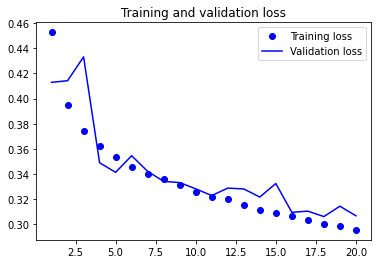

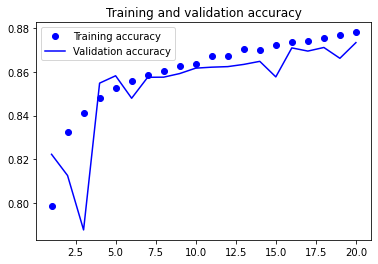

<Figure size 432x288 with 0 Axes>

In [76]:

import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [77]:
# make a prediction
predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
15758/15758 [==============================] - 49s 3ms/step


In [78]:
predictions.shape


(15758, 2)

In [79]:
# This is how to check what index keras has internally assigned to each class. 
test_gen.class_indices

{'a_no_idc': 0, 'b_has_idc': 1}

In [80]:
# Put the predictions into a dataframe.
# The columns need to be ordered to match the output of the previous cell

df_preds = pd.DataFrame(predictions, columns=['no_idc', 'has_idc'])

df_preds.head()


,no_idc,has_idc
0,0.880612,0.119388
1,0.960920,0.039080
2,0.882646,0.117354
3,0.766617,0.233383
4,0.616378,0.383622


In [81]:
#Get the true labels
y_true = test_gen.classes

# Get the predicted labels as probabilities
y_pred = df_preds['has_idc']

In [83]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred)


0.9447055066814366

In [84]:
# selection-plot-confusion-matrix-py


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [85]:

test_labels = test_gen.classes

In [86]:
test_labels.shape

(15758,)

In [87]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [88]:
# Print the label associated with each class
test_gen.class_indices


{'a_no_idc': 0, 'b_has_idc': 1}

Confusion matrix, without normalization
[[6647 1232]
 [ 763 7116]]


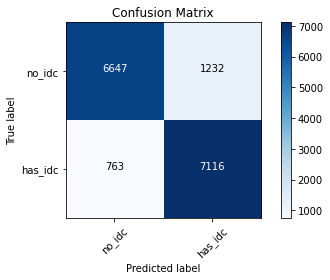

In [89]:
# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = ['no_idc', 'has_idc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [90]:
from sklearn.metrics import classification_report

# Generate a classification report

# For this to work we need y_pred as binary labels not as probabilities
y_pred_binary = predictions.argmax(axis=1)

report = classification_report(y_true, y_pred_binary, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

      no_idc       0.90      0.84      0.87      7879
     has_idc       0.85      0.90      0.88      7879

    accuracy                           0.87     15758
   macro avg       0.87      0.87      0.87     15758
weighted avg       0.87      0.87      0.87     15758



In [91]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 92kB 4.5MB/s 
     |████████████████████████████████| 144.4MB 106kB/s 
     |████████████████████████████████| 256kB 39.7MB/s 
     |████████████████████████████████| 921kB 43.4MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=c5ad27d2d605e67d33ffc53420e4ec9884164b1a9b3492a694affe3718ad6b50
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3
  Found existing installation: tensorflow-hub 0

In [92]:
# Use the command line conversion tool to convert the model

!tensorflowjs_converter --input_format keras model_p2.h5 tfjs_model_1/model

In [93]:
# Delete all_images_dir and base_dir directory to prevent a Kaggle error.
# Kaggle allows a max of 500 files to be saved.

shutil.rmtree('all_images_dir')
shutil.rmtree('base_dir')

In [94]:
!ls


10253  12242  12895  13459  15472  8916  9225
10254  12626  12896  13460  15473  8917  9226
10255  12748  12897  13461  15510  8918  9227
10256  12749  12898  13462  15512  8950  9228
10257  12750  12900  13591  15513  8951  9250
10258  12751  12901  13613  15514  8955  9254
10259  12752  12905  13616  15515  8956  9255
10260  12810  12906  13617  15516  8957  9256
10261  12811  12907  13666  15632  8959  9257
10262  12817  12908  13687  15633  8974  9258
10264  12818  12909  13688  15634  8975  9259
10268  12819  12910  13689  15839  8980  9260
10269  12820  12911  13691  15840  8984  9261
10272  12821  12929  13692  15902  9022  9262
10273  12822  12930  13693  15903  9023  9265
10274  12823  12931  13694  16014  9029  9266
10275  12824  12932  13916  16085  9035  9267
10276  12826  12933  14078  16165  9036  9290
10277  12867  12934  14079  16166  9037  9291
10278  12868  12935  14081  16167  9041  9319
10279  12869  12947  14082  16531  9043  9320
10282  12870  12948  14153  16532 